### Problem Statement
Metro Service Optimization involves analyzing trip frequencies and peak-hour trends to enhance efficiency, reliability, and commuter experience. By leveraging data-driven insights, we can adjust train schedules to alleviate overcrowding, optimize service distribution, and improve operational effectiveness. This study evaluates Hyderabad Metro's weekday operations to propose strategic adjustments for peak and off-peak hours, ensuring better resource utilization and commuter convenience.

#### Foundational Analysis

To optimize metro operations, we first conducted an in-depth analysis of weekday trip frequencies and timing intervals. This involved:

    1. Understanding Trip Distribution: Analyzed the number of trips across different time intervals (early morning, morning peak, midday, evening peak, and late evening) to identify demand fluctuations.
    2. Stop-wise Congestion Patterns: Examined the number of trips per stop to determine potential overcrowding points.
    3. Service Frequency Analysis: Calculated average intervals between consecutive trips to understand the efficiency of current scheduling.
    4. Route Performance Assessment: Compared routes based on trip volume and stops per trip to assess service balance.

This analysis provided critical insights into when and where adjustments are needed for better metro efficiency.
#### Recommendations for Optimization

Based on the foundational analysis, the following optimization techniques can be applied:

    1. Peak-Hour Adjustments: Increase train frequency by 20% during morning and evening peaks to reduce overcrowding and improve commuter flow.
    2. Off-Peak Optimization: Reduce service frequency by 10% during midday and late evening, ensuring efficient resource utilization without impacting passenger experience.
    3. Demand-Based Scheduling: Introduce adaptive scheduling by analyzing congestion patterns and modifying trip timing accordingly.
    4. Route-Specific Improvements: Adjust service distribution for underutilized and overcrowded routes to achieve better network balance.

The dataset contains several files, as follows:

    1. Agency: Information about the Hyderabad Metro Rail Corporation, including name, URL, and contact details.
    2. Calendar: Service schedules delineating the operation days (weekdays, weekends) and valid dates for these schedules.
    3. Routes: Details of metro routes, including short and long names, type of route, and descriptions.
    4. Shapes: Geographical coordinates of routes, providing the precise paths taken by the metro lines.
    5. Stop Times: Timetables for each trip indicating arrival and departure times at specific stops.
    6. Stops: Locations of metro stops, including latitude and longitude coordinates.
    7. Trips: Information linking trips to routes, including details like trip identifiers and associated route IDs.

 Note : You can Download data from http://hmrl.co.in/open-data/

In [2]:
import pandas as pd

#loading all the datasets
agency=pd.read_csv('agency.txt')
calendar=pd.read_csv('calendar.txt')
fare_attributes=pd.read_csv('fare_attributes.txt')
fair_rules=pd.read_csv('fare_rules.txt')
routes=pd.read_csv('routes.txt')
shapes=pd.read_csv('shapes.txt')
stop_times=pd.read_csv('stop_times.txt')
stops=pd.read_csv('stops.txt')
trips=pd.read_csv('trips.txt')

In [3]:
#viewing the first few rows of the imported data frames
data_view={
    "agency":agency.head(),
    "calendar":calendar.head(),
    "fare_attribute":fare_attributes.head(),
    "fair_rules":fair_rules.head(),
    "routes":routes.head(),
    "shapes":shapes.head(),
    "stop_times":stop_times.head(),
    "stops":stops.head(),
    "trips":trips.head()
    
}
data_view

{'agency':   agency_id           agency_name               agency_url agency_timezone  \
 0      HMRL  Hyderabad Metro Rail  https://www.ltmetro.com    Asia/Kolkata   
 
   agency_lang                     agency_fare_url  \
 0          en  https://www.ltmetro.com/ticketing/   
 
                   agency_email    agency_phone  
 0  customerservice@ltmetro.com  +91-4023332555  ,
 'calendar':   service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
 0         WK       1        1          1         1       1         1       1   
 1         SA       0        0          0         0       0         1       0   
 2         SU       0        0          0         0       0         0       1   
 
    start_date  end_date  
 0    20231201  20300101  
 1    20231201  20300101  
 2    20231201  20300101  ,
 'fare_attribute':   fare_id  price currency_type  payment_method  transfers agency_id
 0    F_10     10           INR               1        NaN      HMRL
 1    F_15     1

## analyzing the routes
1. plotting the geographical paths on a map to visualize the network 

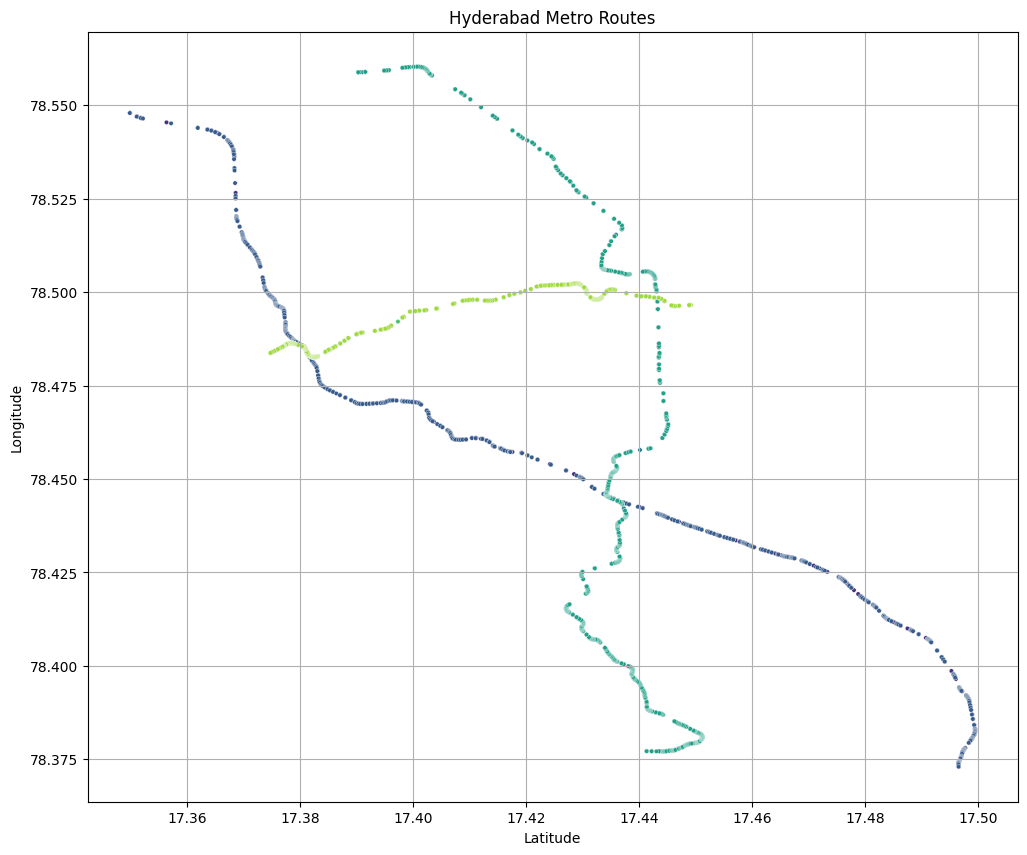

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.scatterplot(x='shape_pt_lat',y='shape_pt_lon',hue='shape_id',data=shapes,palette='viridis',s=10,legend=None)
plt.title('Hyderabad Metro Routes')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()

### examine the frequency and scheduling trips across using the trips and calendars data


In [16]:
# merge trips with calendar to include the day of operation information
trips.head()

,service_id,route_id,trip_id,direction_id,trip_headsign,block_id,shape_id
0,SA,GREEN,SA_101482,0,JBS Parade Ground,SA_20301,GREEN1
1,SA,GREEN,SA_101483,1,Mahatma Gandhi Bus Station,SA_20301,GREEN2
2,SA,GREEN,SA_101484,0,JBS Parade Ground,SA_20101,GREEN1
3,SA,GREEN,SA_101485,1,Mahatma Gandhi Bus Station,SA_20101,GREEN2
4,SA,GREEN,SA_101486,0,JBS Parade Ground,SA_20201,GREEN1


In [17]:
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,WK,1,1,1,1,1,1,1,20231201,20300101
1,SA,0,0,0,0,0,1,0,20231201,20300101
2,SU,0,0,0,0,0,0,1,20231201,20300101


In [20]:
#merging trips and calendars
trip_calendars=pd.merge(trips,calendar,on='service_id',how='inner')
trip_calendars

,service_id,route_id,trip_id,direction_id,trip_headsign,block_id,shape_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,SA,GREEN,SA_101482,0,JBS Parade Ground,SA_20301,GREEN1,0,0,0,0,0,1,0,20231201,20300101
1,SA,GREEN,SA_101483,1,Mahatma Gandhi Bus Station,SA_20301,GREEN2,0,0,0,0,0,1,0,20231201,20300101
2,SA,GREEN,SA_101484,0,JBS Parade Ground,SA_20101,GREEN1,0,0,0,0,0,1,0,20231201,20300101
3,SA,GREEN,SA_101485,1,Mahatma Gandhi Bus Station,SA_20101,GREEN2,0,0,0,0,0,1,0,20231201,20300101
4,SA,GREEN,SA_101486,0,JBS Parade Ground,SA_20201,GREEN1,0,0,0,0,0,1,0,20231201,20300101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,WK,GREEN,WK_156752,0,Secunderabad West,WK_20101,GREEN1,1,1,1,1,1,1,1,20231201,20300101
2816,WK,BLUE,WK_156766,1,Nagole,WK_32001,BLUE2,1,1,1,1,1,1,1,20231201,20300101
2817,WK,BLUE,WK_156769,1,Nagole,WK_32101,BLUE2,1,1,1,1,1,1,1,20231201,20300101
2818,WK,BLUE,WK_156772,0,Raidurg,WK_32101,BLUE1,1,1,1,1,1,1,1,20231201,20300101


In [7]:
trip_calendars=pd.merge(trips,calendar,on='service_id',how='left')
trip_calendars

,service_id,route_id,trip_id,direction_id,trip_headsign,block_id,shape_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,SA,GREEN,SA_101482,0,JBS Parade Ground,SA_20301,GREEN1,0,0,0,0,0,1,0,20231201,20300101
1,SA,GREEN,SA_101483,1,Mahatma Gandhi Bus Station,SA_20301,GREEN2,0,0,0,0,0,1,0,20231201,20300101
2,SA,GREEN,SA_101484,0,JBS Parade Ground,SA_20101,GREEN1,0,0,0,0,0,1,0,20231201,20300101
3,SA,GREEN,SA_101485,1,Mahatma Gandhi Bus Station,SA_20101,GREEN2,0,0,0,0,0,1,0,20231201,20300101
4,SA,GREEN,SA_101486,0,JBS Parade Ground,SA_20201,GREEN1,0,0,0,0,0,1,0,20231201,20300101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,WK,GREEN,WK_156752,0,Secunderabad West,WK_20101,GREEN1,1,1,1,1,1,1,1,20231201,20300101
2816,WK,BLUE,WK_156766,1,Nagole,WK_32001,BLUE2,1,1,1,1,1,1,1,20231201,20300101
2817,WK,BLUE,WK_156769,1,Nagole,WK_32101,BLUE2,1,1,1,1,1,1,1,20231201,20300101
2818,WK,BLUE,WK_156772,0,Raidurg,WK_32101,BLUE1,1,1,1,1,1,1,1,20231201,20300101


In [8]:
#trips count
trips_count=trip_calendars[['monday','tuesday','wednesday','thursday','friday','saturday','sunday']].sum()
trips_count

monday       1072
tuesday      1072
wednesday    1072
thursday     1072
friday       1072
saturday     2045
sunday       1847
dtype: int64

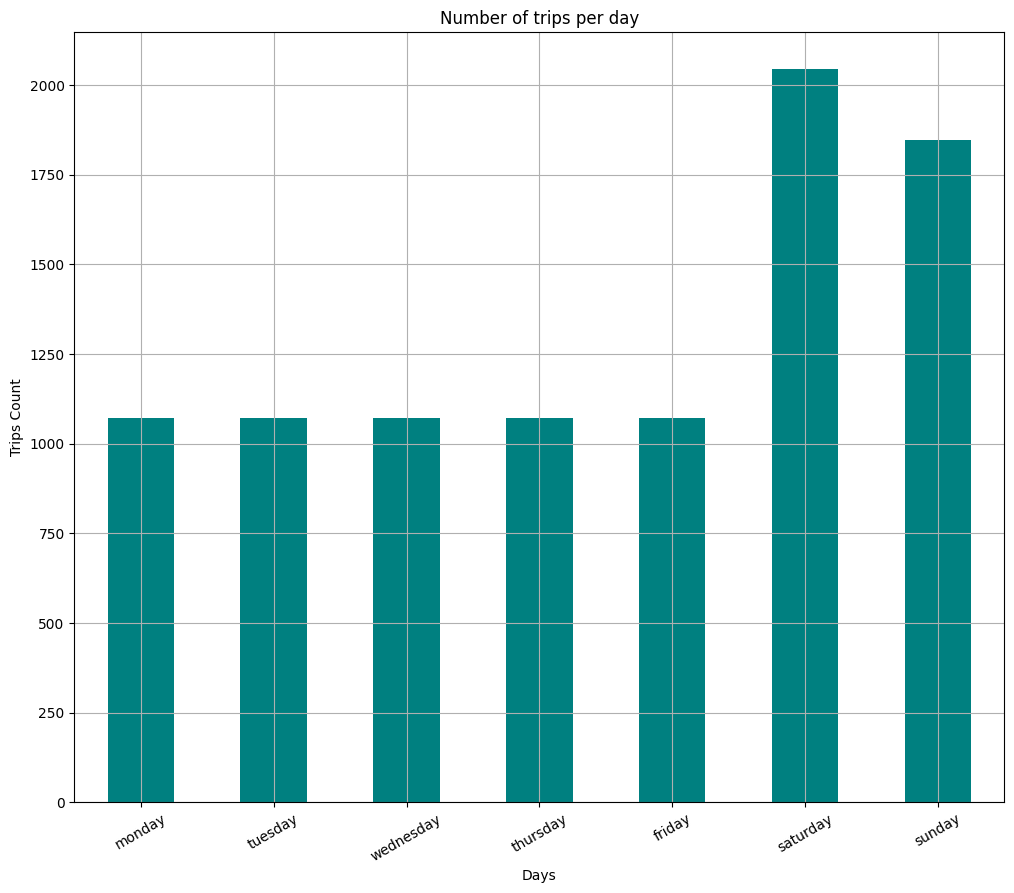

In [9]:
plt.figure(figsize=(12,10))
trips_count.plot(kind='bar',color='teal')
plt.title('Number of trips per day')
plt.xlabel('Days')
plt.ylabel('Trips Count')
plt.xticks(rotation=30) #rotates the x axis labels
plt.grid(True)
plt.show()

The bar chart shows the number of trips scheduled for each day of the week on the Hyderabad Metro. As we can see, the number of journeys from Monday to Friday is consistent, indicating a steady daily schedule geared to handle normal commuter traffic. In contrast, travels increase somewhat on Saturday and Sunday, indicating more demand or an expanded service schedule on weekends due to more leisure travel on weekends.

It shows that the Hyderabad Metro intentionally scales its operations based on predicted daily usage, which is likely to surge on weekends.


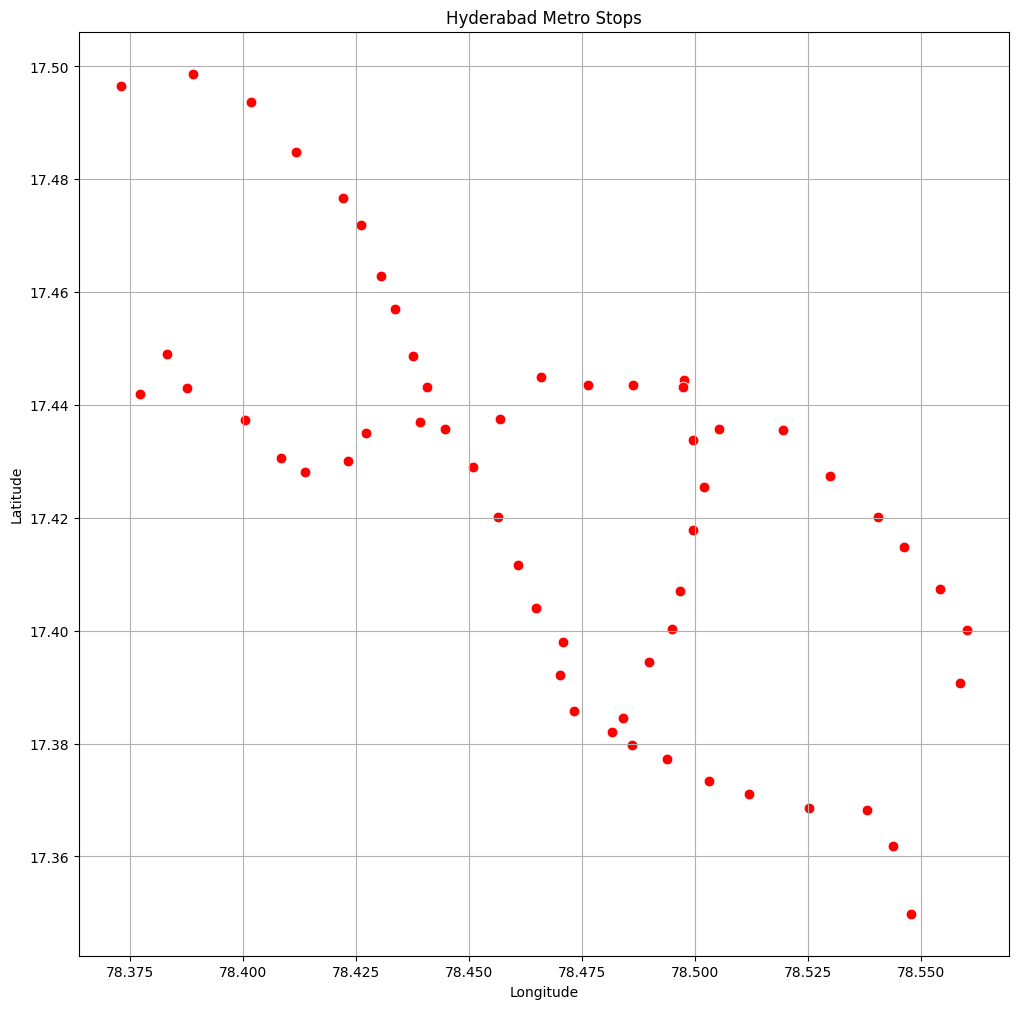

In [10]:
#lets plot the metro stops
parent_stops=stops[stops['location_type']==1]
plt.figure(figsize=(12,12))
sns.scatterplot(x='stop_lon',y='stop_lat',data=parent_stops,color='red',s=60,marker='o')
plt.title('Hyderabad Metro Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

The scatter plot above depicts the geographical distribution of Hyderabad Metro stops. Each red dot symbolizes a metro stop, and their distribution on the map shows how the stops serve various parts of Hyderabad.

The plot shows a wide distribution, indicating that the Hyderabad Metro has high spatial coverage, giving access to a large area and facilitating efficient travel around the city.


In [11]:
import pandas as pd

# Count trips per route
trip_counts = trips.groupby("route_id")["trip_id"].nunique().reset_index()
trip_counts.columns = ["route_id", "num_trips"]

# Merge with route stop count
route_stops = stop_times.groupby("trip_id")["stop_id"].nunique().reset_index()
route_stops = route_stops.merge(trips[["trip_id", "route_id"]], on="trip_id")
route_stop_summary = route_stops.groupby("route_id")["stop_id"].mean().reset_index()
route_stop_summary.columns = ["route_id", "avg_stops_per_trip"]

# Merge trip counts with stop summary
route_efficiency = trip_counts.merge(route_stop_summary, on="route_id")

# Identify inefficient routes
route_efficiency["trips_per_stop"] = route_efficiency["num_trips"] / route_efficiency["avg_stops_per_trip"]
route_efficiency.sort_values(by="trips_per_stop", ascending=False)


,route_id,num_trips,avg_stops_per_trip,trips_per_stop
1,GREEN,517,8.967118,57.655091
0,BLUE,1146,22.487784,50.961003
2,RED,1157,26.726016,43.291152


Key Observations

    GREEN Line (Most Efficient in Terms of Trips Per Stop)
        Lowest number of trips (517), but also the shortest route (9 avg stops).
        Highest trips per stop (57.65), meaning stations on this route see frequent trains relative to their length.
        Despite fewer overall trips, this suggests a highly active route with closely spaced stations.

    BLUE Line (Balanced)
        Second most trips (1146), but longer than GREEN (23 avg stops).
        Trips per stop (50.96) is slightly lower than GREEN, meaning stations see slightly fewer trains per stop than GREEN.
        Since it has a high number of stops, individual stations get slightly less frequent trains compared to GREEN.

    RED Line (Least Efficient in Terms of Trips Per Stop)
        Most trips (1157), but also the longest route (27 avg stops).
        Trips per stop is lowest (43.29), meaning stations experience fewer trains per stop compared to GREEN or BLUE.
        This might indicate lower service density per station, possibly causing congestion issues at key stops.

Takeaways

    GREEN Line is highly efficient in terms of trip frequency relative to its size.
    BLUE Line is balanced, having more trips than GREEN but slightly lower efficiency.
    RED Line, despite having the most trips, has the lowest efficiency per stop, meaning either it's a very long route or some stations get fewer trains.

/tmp/ipykernel_3562/3717344376.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)
/tmp/ipykernel_3562/3717344376.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='part_of_day', y='interval_minutes', data=average_intervals, order=['Morning', 'Afternoon', 'Evening'], palette='mako',legend=False)


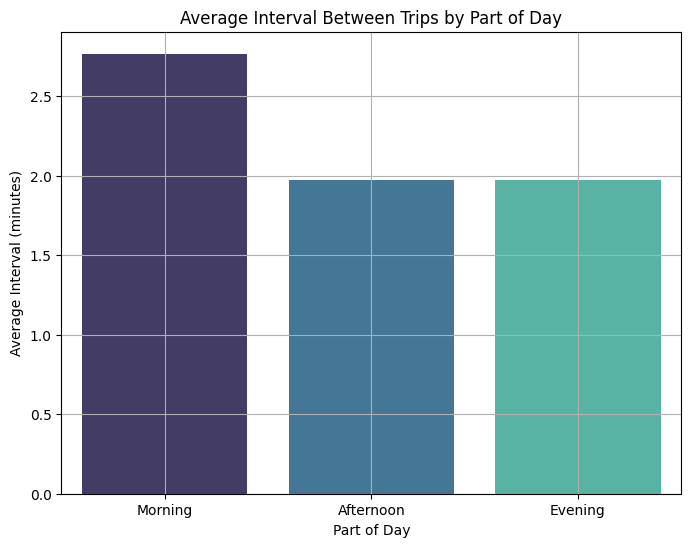

In [12]:
import datetime as dt

# function to convert time string to datetime.time
def convert_to_time(time_str):
    try:
        return dt.datetime.strptime(time_str, '%H:%M:%S').time()
    except ValueError:
        # Handle cases where the hour might be greater than 23 (e.g., 24:00:00 or 25:00:00)
        hour, minute, second = map(int, time_str.split(':'))
        return dt.time(hour % 24, minute, second)
stop_times['arrival_time_dt'] = stop_times['arrival_time'].apply(convert_to_time)

# calculate the difference in arrival times for subsequent trips at each stop
stop_times_sorted = stop_times.sort_values(by=['stop_id', 'arrival_time_dt'])
stop_times_sorted['next_arrival_time'] = stop_times_sorted.groupby('stop_id')['arrival_time_dt'].shift(-1)

# function to calculate the difference in minutes between two times
def time_difference(time1, time2):
    if pd.isna(time1) or pd.isna(time2):
        return None
    full_date_time1 = dt.datetime.combine(dt.date.today(), time1)
    full_date_time2 = dt.datetime.combine(dt.date.today(), time2)
    return (full_date_time2 - full_date_time1).seconds / 60

stop_times_sorted['interval_minutes'] = stop_times_sorted.apply(lambda row: time_difference(row['arrival_time_dt'], row['next_arrival_time']), axis=1)

# drop NaN values from intervals (last trip of the day)
stop_times_intervals = stop_times_sorted.dropna(subset=['interval_minutes'])

# average intervals by time of day (morning, afternoon, evening)
def part_of_day(time):
    if time < dt.time(12, 0):
        return 'Morning'
    elif time < dt.time(17, 0):
        return 'Afternoon'
    else:
        return 'Evening'

stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)
average_intervals = stop_times_intervals.groupby('part_of_day')['interval_minutes'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='part_of_day', y='interval_minutes', data=average_intervals, order=['Morning', 'Afternoon', 'Evening'], palette='mako',legend=False)
plt.title('Average Interval Between Trips by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Average Interval (minutes)')
plt.grid(True)
plt.show()

Now, let’s calculate the number of trips and the available capacity per time interval. It will give us a basic understanding of how service levels vary throughout the day. We’ll classify the intervals as:

    Early Morning: Before 6 AM
    Morning Peak: 6 AM to 10 AM
    Midday: 10 AM to 4 PM
    Evening Peak: 4 PM to 8 PM
    Late Evening: After 8 PM


/tmp/ipykernel_3562/2563080614.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_interval', y='number_of_trips', data=trips_per_interval, palette='Set2')


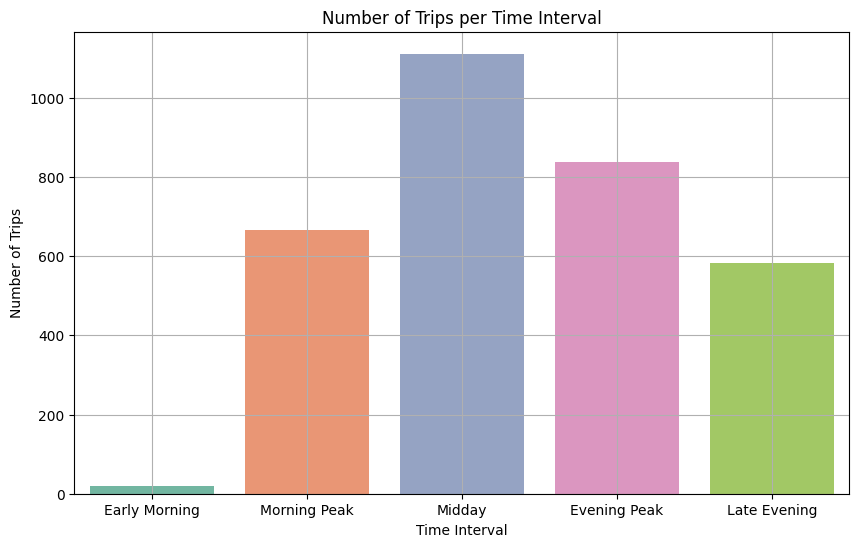

In [13]:
# define time intervals for classification
def classify_time_interval(time):
    if time < dt.time(6, 0):
        return 'Early Morning'
    elif time < dt.time(10, 0):
        return 'Morning Peak'
    elif time < dt.time(16, 0):
        return 'Midday'
    elif time < dt.time(20, 0):
        return 'Evening Peak'
    else:
        return 'Late Evening'

# apply time interval classification
stop_times['time_interval'] = stop_times['arrival_time_dt'].apply(classify_time_interval)

# count the number of trips per time interval
trips_per_interval = stop_times.groupby('time_interval')['trip_id'].nunique().reset_index()
trips_per_interval = trips_per_interval.rename(columns={'trip_id': 'number_of_trips'})

# sorting the dataframe
ordered_intervals = ['Early Morning', 'Morning Peak', 'Midday', 'Evening Peak', 'Late Evening']
trips_per_interval['time_interval'] = pd.Categorical(trips_per_interval['time_interval'], categories=ordered_intervals, ordered=True)
trips_per_interval = trips_per_interval.sort_values('time_interval')

# plotting the number of trips per time interval
plt.figure(figsize=(10, 6))
sns.barplot(x='time_interval', y='number_of_trips', data=trips_per_interval, palette='Set2')
plt.title('Number of Trips per Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

### observations:
The bar chart displays the number of trips scheduled for each time interval in the Hyderabad Metro system. From this visualization, we can observe the following:
1. Early Morning: Fewer trips run during these hours, likely due to lower demand or limited scheduled services.
2. Morning Peak: A sharp rise in trips occurs, reflecting the morning rush as people commute to work or school.
3. Midday: Trip frequency remains high, possibly sustaining the morning demand or accommodating midday travel needs.
4. Evening Peak: While slightly lower than midday, this period remains busy, likely due to the evening commute.
5. Late Evening: Trip frequency declines but stays above early morning levels, catering to late-night travelers and evening activities.